In [1]:
from os import listdir

import csv
import numpy as np
import glob

from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import animation as animation
from scipy import misc
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn import svm
import matplotlib.image as mpimg
from sklearn.model_selection import cross_val_score, train_test_split


In [31]:
width = 120

types_dict = {
    0: 'bug',
    1: 'dark',
    2: 'dragon',
    3: 'electric',
    4: 'fairy',
    5: 'fighting',
    6: 'fire',
    7: 'flying',
    8: 'ghost',
    9: 'grass',
    10: 'ground',
    11: 'ice',
    12: 'normal',
    13: 'poison',
    14: 'psychic',
    15: 'rock',
    16: 'steel',
    17: 'water',
 }


In [32]:
def plot_images(images, n_col=3, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((width, width, 4)),
                   interpolation='nearest')
        plt.xticks(())
        plt.yticks(())

In [33]:
# directory = 'official-artwork/'
directory = 'sprites1/'

images = [np.array(mpimg.imread(fname)).reshape(width * width * 4)
          for fname in [directory + fname for fname in listdir(directory)]]
x = np.array(images)


In [34]:

mean = np.mean(x, axis=0)
# mean = np.zeros(x.shape[0])
x_norm = x - mean
print(mean)

[  6.46907926e-01   6.47273660e-01   6.48078740e-01 ...,   6.47273660e-01
   6.48078740e-01   7.31796608e-05]


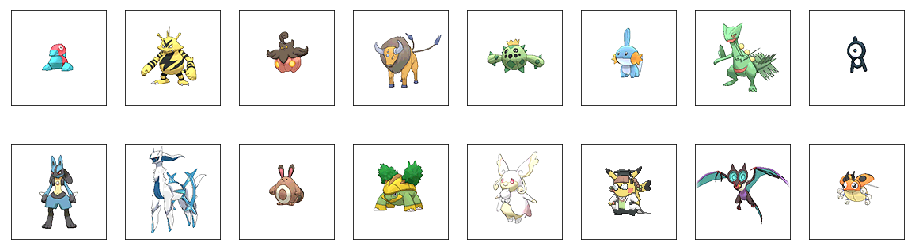

In [35]:
plot_images((x_norm + mean)[:16], 8, 2)
plt.show()

In [36]:
pca = PCA(n_components=0.99) # 244 components, 0.9 variance; 277 for sprites
transformed = pca.fit_transform(x_norm)
inverse = pca.inverse_transform(transformed)
print(pca.n_components_)

535


In [6]:
# print(pca.n_components_)
ptype = 'fire'
pokemon_dict = csv.DictReader(open('pokemon.csv', 'r'), delimiter=',')
y = np.array([int(row['type1'] == ptype or row['type2'] == ptype) for row in pokemon_dict])[:720]
print(sum(y))

56


In [19]:
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.2, random_state=42)

In [21]:
print(sum(y_train))
clf = svm.SVC(C=1000, kernel='linear', gamma=0.0005)
clf.fit(X_train, y_train)
score = cross_val_score(clf , X_train, y_train, cv=5)
print("Cross val score for SVC: {}".format(score))
print("Mean cross val score: {}".format(score.mean()))
print("Number of support vector: {}".format(clf.n_support_))

43
Cross val score for SVC: [ 0.9137931   0.9137931   0.92241379  0.9122807   0.90350877]
Mean cross val score: 0.9131578947368422
Number of support vector: [218  43]


In [26]:
miss = clf.predict(transformed) ^ y
for i in range(len(miss)):
    if miss[i] > 0:
        print(i)

76
77
135
145
155
227
254
323
390
417
493
636
652
654


In [52]:
for i, ptype in types_dict.items():
    pokemon_dict = csv.DictReader(open('pokemon.csv', 'r'), delimiter=',')
    y = np.array([int(row['type1'] == ptype or row['type2'] == ptype) for row in pokemon_dict])[:720]
    X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)
    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    print("Type: {} =============".format(ptype))
    score = cross_val_score(clf , X_train, y_train, cv=5)
    print("Cross val score for SVC: {}".format(score))
    print("Mean cross val score: {}".format(score.mean()))

Type: bug =============
Cross val score for SVC: [ 0.90517241  0.90434783  0.90434783  0.90434783  0.90434783]
Mean cross val score: 0.9045127436281859
Type: dark =============
Cross val score for SVC: [ 0.92241379  0.93043478  0.93043478  0.93043478  0.93043478]
Mean cross val score: 0.9288305847076461
Type: dragon =============
Cross val score for SVC: [ 0.93965517  0.93965517  0.93913043  0.93913043  0.94736842]
Mean cross val score: 0.9409879270890871
Type: electric =============
Cross val score for SVC: [ 0.93103448  0.93103448  0.93913043  0.93913043  0.93859649]
Mean cross val score: 0.9357852652621059
Type: fairy =============
Cross val score for SVC: [ 0.94827586  0.94827586  0.94827586  0.95614035  0.95614035]
Mean cross val score: 0.9514216575922566
Type: fighting =============
Cross val score for SVC: [ 0.93965517  0.93965517  0.94782609  0.94782609  0.94736842]
Mean cross val score: 0.9444661879586522
Type: fire =============
Cross val score for SVC: [ 0.92241379  0.922413

KeyboardInterrupt: 

In [69]:
# for i, c in enumerate(pca.components_):
#     for x in c:
#         if x < 0 or x > 1:
#             print(i)
# for a in mean:
#     print(a)
for i in range(inverse.shape[1]):
    print(x[0][i], (inverse[0] + mean)[i])

0.0 9.19133e-07
0.0 -3.69958e-07
0.0 3.67192e-06
0.0 5.36163e-06
0.0 -3.13299e-06
0.0 1.84974e-06
0.0 -5.36876e-07
0.0 1.15084e-07
0.0 -1.68677e-06
0.0 -1.62694e-06
0.0 1.53796e-06
0.0 8.74788e-07
0.0 3.00335e-06
0.0 1.39669e-06
0.0 -8.32279e-07
0.0 -1.07708e-06
0.0 -1.82351e-07
0.0 -1.05779e-06
0.0 -4.7574e-07
0.0 2.9919e-06
0.0 9.44091e-07
0.0 1.07885e-06
0.0 -1.22159e-06
0.0 -3.55161e-07
0.0 2.32462e-07
0.0 8.92613e-07
0.0 2.09154e-06
0.0 -3.26116e-07
0.0 9.47728e-07
0.0 5.5502e-07
0.0 -1.2167e-07
0.0 -2.38859e-06
0.0 -8.99141e-07
0.0 -1.1688e-06
0.0 -1.79032e-06
0.0 -2.21989e-06
0.0 -2.48591e-07
0.0 -8.24753e-07
0.0 -5.19443e-07
0.0 -1.48154e-06
0.0 1.10586e-06
0.0 4.82381e-07
0.0 -6.90661e-07
0.0 -1.11178e-06
0.0 -1.79364e-06
0.0 2.32918e-07
0.0 -2.093e-07
0.0 -1.48457e-08
0.0 6.50303e-07
0.0 -3.39418e-07
0.0 4.42541e-08
0.0 4.4533e-07
0.0 -2.60788e-07
0.0 2.56425e-07
0.0 6.5411e-08
0.0 1.48028e-07
0.0 1.23677e-07
0.0 2.05343e-07
0.0 4.31701e-07
0.0 -6.03031e-07
0.0 -1.82146e-07
0

0.0 8.50109e-08
0.0 -1.27768e-08
0.0 -3.05355e-07
0.0 1.80793e-07
0.0 1.35272e-08
0.0 1.47528e-07
0.0 -3.05744e-07
0.0 -4.762e-07
0.0 8.03314e-08
0.0 -1.22642e-07
0.0 0.00252385
0.0 0.00200387
0.0 0.00141035
0.0 5.79223e-08
0.0 0.0023012
0.0 0.00185541
0.0 0.00133638
0.0 0.00289496
0.0 0.0061607
0.0 0.00452733
0.0 0.00319166
0.0 0.016849
0.0 0.00593813
0.0 0.00437944
0.0 0.0031178
0.0 0.0158103
0.0 0.00118733
0.0 0.00103906
0.0 0.000742111
0.0 0.00170725
0.0 0.00133603
0.0 0.00118776
0.0 0.00081655
0.0 -4.50248e-08
0.0 0.0088329
0.0 0.00653205
0.0 0.00460202
0.0 -7.41687e-08
0.0 0.00326585
0.0 0.00252372
0.0 0.00178168
0.0 0.00289483
0.0 0.0025237
0.0 0.00200411
0.0 0.0014103
0.0 0.00334019
0.0 0.00749688
0.0 0.00549275
0.0 0.00400823
0.0 0.0
0.0 0.000519585
0.0 0.000593812
0.0 0.000371132
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.000404722
0.0 0.000369528
0.0 0.000369528
0.0 0.0
0.0 0.000457511
0.0 0.000422318
0.0 0.000404722
0.0 0.000545493
0.0 0.000902149
0.0 0.00086696
0.0 0.000874365
0.0 0.00387125
0.0 0.00137892
0.0 0.00133562
0.0 0.00136063
0.0 0.00296285
0.0 -0.0148596
0.0 -0.0149177
0.0 -0.0148812
0.0 -0.000297046
0.0 -0.00324339
0.0 -0.00329834
0.0 -0.00325546
0.0 -0.000224801
0.0 -0.00292388
0.0 -0.000805527
0.0 0.000291693
0.0 0.0191788
0.0 0.0112319
0.0 0.0169493
0.0 0.01984
0.0 0.0324631
0.0 0.0125787
0.0 0.0168219
0.0 0.0187167
0.0 0.0316542
0.0 0.0016461
0.0 0.00688568
0.0 0.0057766
0.0 0.0384608
0.0 0.00899384
0.0 0.0126345
0.0 0.0112712
0.0 0.0250207
0.0 0.0047624
0.0 0.0140664
0.0 0.00798854
0.0 0.00565759
0.0 0.0140548
0.0 0.0201821
0.0 0.012885
0.0 0.0219018
0.0 0.00205791
0.0 0.00667038
0.0 0.000

0.0 0.171075
0.0 0.177865
0.0 0.185026
0.0 0.148551
0.0 0.126986
0.0 0.144655
0.0 0.13071
0.0 0.0830061
0.0 0.0713879
0.0 0.0815214
0.0 0.143177
0.0 0.0534686
0.0 0.0388624
0.0 0.0347829
0.0 0.139426
0.0 0.150997
0.0 0.125013
0.0 0.116364
0.0 0.13265
0.0 0.122657
0.0 0.0985069
0.0 0.0687194
0.0 0.166881
0.0 0.184978
0.0 0.144706
0.0 0.134688
0.0 0.223284
0.0 0.189699
0.0 0.157362
0.0 0.147113
0.0 0.291496
0.0 0.21431
0.0 0.188633
0.0 0.18941
0.0 0.32884
0.0 0.169398
0.0 0.157553
0.0 0.140938
0.0 0.2285
0.0 0.190467
0.0 0.18207
0.0 0.162672
0.0 0.127789
0.0 0.12429
0.0 0.127486
0.0 0.11078
0.0 0.079075
0.0 0.15658
0.0 0.147988
0.0 0.105673
0.0 0.124927
0.0 0.227358
0.0 0.192013
0.0 0.144457
0.0 0.167419
0.0 0.223678
0.0 0.198678
0.0 0.151798
0.0 0.227615
0.0 0.225601
0.0 0.193197
0.0 0.144913
0.0 0.248769
0.0 0.175157
0.0 0.141488
0.0 0.0935899
0.0 0.212034
0.0 0.133627
0.0 0.0917486
0.0 0.0662545
0.0 0.140412
0.0 0.047675
0.0 0.0227083
0.0 0.0134155
0.0 0.104511
0.0 0.104691
0.0 0.0984

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.00966109
0.0 0.0104401
0.0 0.0101186
0.0 0.0
0.0 0.0063497
0.0 0.00666894
0.0 0.00639673
0.0 0.00320607
0.0 0.0143647
0.0 0.015831
0.0 0.0166097
0.0 0.00886191
0.0 0.00942841
0.0 0.01138
0.0 0.0112441
0.0 0.0125166
0.0 0.0184656
0.0 0.0197982
0.0 0.0213426
0.0 0.0290163
0.0 -0.00038977
0.0 0.000923488
0.0 0.00318242
0.0 0.000760153
0.0 -0.0166769
0.0 -0.0204721
0.0 -0.0178304
0.0 -0.014482
0.0 0.00390515
0.0 0.00241841
0.0 0.0059135
0.0 -0.00242687
0.0 0.00208477
0.0 0.00128272
0.0 0.0043375
0.0 0.0175399
0.0 0.0656375
0.0 0.0546331
0.0 0.0441277
0.0 0.0534685
0.0 0.0643338
0.0 0.0498554
0.0 0.0441236
0.0 0.0922812
0.0 0.0763842
0.0 0.0621578
0.0 0.0549728
0.0 0.138496
0.0 0.0405695
0.0 0.0347392
0.0 0.0362369
0.0 0.160744
0.0 0.0334546
0.0 0.0283336
0.0 0.0465613
0.0 0.160051
0.0 0.0849621
0.0 0.0726394
0.0 0.0934727
0.0 0.131657
0.0 0.0685598
0.0 0.0548863
0.0 0.0944406
0.0 0.111687
0.0 0.07

1.0 1.31305
0.968627 1.11839
0.784314 0.973259
0.807843 0.960308
1.0 1.33257
0.968627 1.25341
0.780392 1.06597
0.803922 1.03201
1.0 1.36578
0.956863 1.14789
0.772549 0.960271
0.796078 0.937906
1.0 1.39983
0.952941 1.18702
0.772549 0.997614
0.796078 0.995376
1.0 1.43121
0.952941 1.21929
0.772549 1.03024
0.796078 1.04109
1.0 1.45335
0.952941 1.20546
0.772549 1.01427
0.796078 1.04128
1.0 1.49189
0.952941 1.21262
0.772549 1.0381
0.796078 1.06401
1.0 1.44143
0.952941 1.11881
0.772549 0.948063
0.796078 0.988114
1.0 1.38555
0.960784 1.20288
0.776471 1.04364
0.8 1.05629
1.0 1.49049
0.968627 1.18102
0.780392 1.01486
0.803922 1.02212
1.0 1.50882
0.968627 1.26317
0.780392 1.07369
0.803922 1.05803
1.0 1.47035
0.968627 1.29118
0.780392 1.08573
0.803922 1.05433
1.0 1.56064
0.972549 1.30709
0.788235 1.10264
0.811765 1.04819
1.0 1.51319
0.745098 1.0869
0.556863 0.908911
0.576471 0.847163
1.0 1.42973
0.796078 1.01025
0.341176 0.666739
0.392157 0.628091
1.0 1.32071
0.894118 1.0391
0.376471 0.647719
0.43

0.0 0.256183
0.0 0.182941
0.0 0.257125
0.0 0.220258
0.0 0.234601
0.0 0.270941
0.0 0.200748
0.0 0.179138
0.0 0.183431
0.0 0.259804
0.0 0.28403
0.0 0.239223
0.0 0.259496
0.0 0.291204
0.0235294 0.333842
0.0235294 0.290939
0.0235294 0.31509
0.0 0.412471
0.0 0.299622
0.0 0.276608
0.0 0.311035
0.145098 0.619584
0.462745 0.621533
0.541176 0.687878
0.54902 0.73151
0.878431 1.12852
0.768627 0.836421
0.901961 0.924207
0.917647 0.971568
1.0 1.32889
0.764706 0.867008
0.898039 0.985789
0.913725 1.02303
1.0 1.3563
0.733333 0.798368
0.866667 0.966984
0.886275 0.986316
1.0 1.27717
0.388235 0.479351
0.552941 0.667505
0.580392 0.683043
1.0 1.15239
0.282353 0.378306
0.47451 0.602602
0.505882 0.629172
1.0 1.15763
0.290196 0.400546
0.513726 0.634321
0.54902 0.650586
1.0 1.16523
0.129412 0.264085
0.231373 0.412694
0.247059 0.453927
0.768627 0.856686
0.0 0.0840361
0.0 0.181745
0.0 0.181358
0.0509804 0.261818
0.0 0.00385498
0.0 0.0687676
0.0 0.0666787
0.0 0.187294
0.0 0.0112414
0.0 0.0619781
0.0 0.0778168
0.0

0.694118 0.806818
0.996078 1.21906
0.960784 1.12005
0.780392 0.966291
0.803922 0.97948
1.0 1.26207
0.960784 1.14703
0.776471 0.974112
0.8 0.992015
1.0 1.33156
0.968627 1.22383
0.780392 1.04042
0.803922 1.04648
1.0 1.37529
0.968627 1.25836
0.780392 1.0567
0.807843 1.05732
1.0 1.48939
0.968627 1.33723
0.780392 1.08818
0.807843 1.06623
1.0 1.54645
0.968627 1.36745
0.780392 1.12223
0.807843 1.08445
1.0 1.57444
0.968627 1.39727
0.780392 1.19906
0.807843 1.13707
1.0 1.51562
0.968627 1.3107
0.780392 1.12926
0.807843 1.0749
1.0 1.41747
0.968627 1.26447
0.780392 1.08547
0.803922 1.03687
1.0 1.47757
0.960784 1.278
0.776471 1.10448
0.8 1.06219
1.0 1.49514
0.960784 1.16831
0.776471 1.01213
0.8 0.97164
1.0 1.46664
0.968627 1.35404
0.784314 1.13045
0.807843 1.09466
1.0 1.4967
0.972549 1.31797
0.788235 1.12583
0.811765 1.09738
1.0 1.52729
0.968627 1.31536
0.784314 1.09754
0.807843 1.05668
1.0 1.61021
0.929412 1.28976
0.752941 1.09188
0.772549 1.04793
1.0 1.63983
0.831373 1.27888
0.67451 1.09141
0.694

0.0 0.0934435
0.0 0.174451
0.0 0.251565
0.0 0.23025
0.0 0.189011
0.0 0.254667
0.0 0.216179
0.0 0.183403
0.0 0.162616
0.0 0.360014
0.0 0.256895
0.0 0.21673
0.0 0.193265
0.0 0.318803
1.0 0.90227
1.0 0.844613
1.0 0.806362
0.0 0.312542
0.223529 0.536379
0.184314 0.432883
0.188235 0.377292
0.439216 0.755502
0.756863 1.01207
0.619608 0.852343
0.635294 0.824964
0.984314 1.27974
0.964706 1.19309
0.780392 1.02842
0.803922 1.04156
1.0 1.34501
0.952941 1.22124
0.772549 1.0673
0.796078 1.06932
1.0 1.39595
0.960784 1.26293
0.776471 1.12442
0.8 1.12972
1.0 1.48138
0.968627 1.28614
0.780392 1.15273
0.807843 1.14661
1.0 1.55603
0.968627 1.2734
0.780392 1.15986
0.811765 1.16104
1.0 1.61794
0.968627 1.23203
0.780392 1.11091
0.811765 1.12121
1.0 1.60099
0.968627 1.29944
0.780392 1.12348
0.807843 1.11481
1.0 1.49629
0.968627 1.2914
0.780392 1.11419
0.807843 1.07842
1.0 1.44351
0.968627 1.30106
0.780392 1.13043
0.807843 1.09314
1.0 1.49988
0.968627 1.36452
0.780392 1.21957
0.803922 1.17877
1.0 1.46749
0.96

0.956863 1.24753
0.772549 1.11179
0.796078 1.13194
1.0 1.53827
0.956863 1.24427
0.772549 1.07229
0.796078 1.08574
1.0 1.51371
0.952941 1.29356
0.772549 1.14331
0.796078 1.14662
1.0 1.49588
0.952941 1.32985
0.772549 1.15263
0.796078 1.10987
1.0 1.58716
0.952941 1.33179
0.772549 1.2149
0.796078 1.15905
1.0 1.65984
0.956863 1.31161
0.776471 1.19031
0.8 1.16579
1.0 1.68036
0.870588 1.22564
0.705882 1.0518
0.72549 1.03486
1.0 1.63908
0.580392 1.09313
0.521569 0.953094
0.52549 0.921789
1.0 1.59175
0.929412 1.3188
0.882353 1.19971
0.886275 1.18933
1.0 1.62386
0.941176 1.43978
0.901961 1.31343
0.917647 1.2978
1.0 1.69535
0.905882 1.45272
0.866667 1.32429
0.898039 1.32104
1.0 1.7491
0.890196 1.44743
0.854902 1.30485
0.894118 1.31009
1.0 1.82827
0.870588 1.41232
0.835294 1.28653
0.87451 1.31
1.0 1.83103
0.823529 1.24939
0.792157 1.15943
0.815686 1.1994
1.0 1.77642
0.878431 1.32954
0.835294 1.24512
0.839216 1.27455
1.0 1.75894
0.866667 1.25282
0.819608 1.15905
0.819608 1.16437
1.0 1.77068
0.86666

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0517526
0.0 0.0441183
0.0 0.0417834
0.0 0.0
0.0 0.0230228
0.0 0.0166569
0.0 0.0182474
0.0 0.0247609
0.0 0.0677042
0.0 0.0653696
0.0 0.0622977
0.0 0.0782501
0.0 0.109001
0.0 0.0845473
0.0 0.0981594
0.0 0.101127
0.0 0.0854511
0.0 0.0655211
0.0 0.0737127
0.0 0.0993881
0.0 0.0960499
0.0 0.0630913
0.0 0.0791637
0.0 0.0693793
0.0 0.0804322
0.0 0.0585782
0.0 0.0489009
0.0 0.0977192
0.0 0.127223
0.0 0.0706493
0.0 0.0670292
0.0 0.185022
0.0 0.196033
0.0 0.159034
0.0 0.119436
0.0 0.267503
0.0 0.231481
0.0 0.189456
0.0 0.144232
0.0 0.303277
0.172549 0.386025
0.141176 0.34867
0.145098 0.305638
0.0 0.36151
0.0941176 0.409503
0.0784314 0.332517
0.0784314 0.30608
0.207843 0.574526
0.619608 0.757746
0.509804 0.618435
0.52549 0.612125
0.890196 0.996049
0.956863 1.09911
0.776471 0.89544
0.796078 0.88623
1.0 1.11195
0.952941 1.25463
0.772549 1.0154
0.796078 0.993878
1.0 1.25003
0.952941 1.29531
0.772549 1.0345
0.796078 1.02894


0.682353 1.1523
0.643137 0.999054
0.643137 1.04837
1.0 1.72102
0.87451 1.34339
0.827451 1.1784
0.827451 1.23298
1.0 1.69915
0.866667 1.47681
0.815686 1.32084
0.815686 1.36957
1.0 1.85507
0.866667 1.42088
0.815686 1.31407
0.815686 1.37931
1.0 1.95965
0.870588 1.51572
0.823529 1.40656
0.823529 1.45602
1.0 1.92662
0.866667 1.41835
0.815686 1.34737
0.815686 1.40773
1.0 1.86859
0.788235 1.3145
0.741176 1.22918
0.741176 1.29871
1.0 1.82762
0.713726 1.21236
0.666667 1.13756
0.666667 1.2306
1.0 1.76399
0.705882 1.24593
0.662745 1.16104
0.658824 1.25313
1.0 1.70391
0.705882 1.24146
0.662745 1.14211
0.662745 1.23977
1.0 1.7855
0.705882 1.17558
0.662745 1.07476
0.662745 1.14242
1.0 1.92152
0.670588 1.19204
0.635294 1.08283
0.631373 1.11054
1.0 1.9706
0.392157 1.00318
0.27451 0.823758
0.282353 0.829375
1.0 1.90443
0.603922 1.10877
0.286275 0.802939
0.321569 0.82538
1.0 1.82835
0.623529 1.16735
0.298039 0.836075
0.333333 0.853555
1.0 1.85313
0.619608 1.1776
0.298039 0.854204
0.333333 0.866169
1.0 1

0.0 0.94124
0.0 0.597688
0.0 0.464779
0.0 0.475296
0.00784314 0.909416
0.0 0.49482
0.0 0.379764
0.0 0.361308
0.027451 0.812636
0.0 0.478183
0.0 0.3716
0.0 0.345316
0.0627451 0.812276
0.00784314 0.503569
0.00784314 0.41893
0.00784314 0.374295
0.0901961 0.882437
0.00392157 0.556151
0.0 0.490152
0.0 0.444169
0.192157 1.00717
0.0627451 0.667514
0.101961 0.644622
0.105882 0.600607
0.827451 1.37834
0.270588 0.693761
0.443137 0.727533
0.466667 0.713469
1.0 1.50153
0.290196 0.838277
0.454902 0.847443
0.47451 0.860288
1.0 1.58122
0.282353 0.816369
0.501961 0.884784
0.52549 0.900069
1.0 1.66105
0.337255 0.792374
0.662745 0.927781
0.694118 0.913079
1.0 1.58617
0.356863 0.774672
0.709804 0.913273
0.74902 0.892862
1.0 1.50235
0.227451 0.695186
0.419608 0.782684
0.439216 0.771806
1.0 1.55317
0.270588 0.672828
0.423529 0.74672
0.443137 0.733527
1.0 1.5613
0.278431 0.686182
0.439216 0.778346
0.45098 0.759229
1.0 1.62579
0.27451 0.58138
0.431373 0.649694
0.443137 0.64843
1.0 1.54888
0.278431 0.56847
0.

0.0 0.201608
0.0 0.181819
0.0 0.163818
0.0 0.268997
0.0 0.202521
0.0 0.202205
0.0 0.161611
0.0 0.243251
0.0 0.21123
0.0 0.197781
0.0 0.159366
0.0 0.251874
0.0 0.105553
0.0 0.12466
0.0 0.0954815
0.0 0.229864
0.0 0.151924
0.0 0.16834
0.0 0.146359
0.0 0.187705
0.0 0.12208
0.0 0.127598
0.0 0.120974
0.0 0.14313
0.0 0.0983801
0.0 0.088086
0.0 0.0800819
0.0 0.137706
0.0 0.0761828
0.0 0.0444245
0.0 0.0508339
0.0 0.106182
0.0 0.110183
0.0 0.0947085
0.0 0.0947983
0.0 0.0992805
0.0 0.0585386
0.0 0.0600164
0.0 0.069757
0.0 0.104074
0.0 0.00843827
0.0 -0.00560075
0.0 0.00115389
0.0 0.0325155
0.0 -0.00363555
0.0 -0.0196707
0.0 -0.0149295
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.103667
0.0 0.103094
0.0 0.107397
0.0 0.0
0.0 0.118054
0.0 0.106285
0.0 0.114723
0.0 0.0386935
0.0 0.119072
0.0 0.106847
0.0 0.119934
0.0 0.128691
0.0 0.114793
0.0

1.0 1.3177
0.752941 1.0313
0.878431 1.1227
0.890196 1.10094
1.0 1.41693
0.737255 1.10645
0.870588 1.1723
0.882353 1.13939
1.0 1.403
0.698039 0.879932
0.85098 0.993655
0.870588 0.959519
1.0 1.35355
0.65098 0.863026
0.835294 0.987816
0.858824 0.961631
1.0 1.25039
0.615686 0.840167
0.827451 0.978914
0.858824 0.949034
1.0 1.23636
0.6 0.90744
0.819608 1.05921
0.854902 0.998719
1.0 1.291
0.6 0.977063
0.819608 1.13267
0.858824 1.10013
1.0 1.36869
0.6 1.03708
0.819608 1.18647
0.858824 1.15694
1.0 1.46152
0.6 1.01165
0.819608 1.17746
0.858824 1.14982
1.0 1.6842
0.6 1.05009
0.819608 1.22322
0.854902 1.20383
1.0 1.87666
0.6 0.929526
0.811765 1.11031
0.839216 1.11001
1.0 1.79861
0.396078 0.837585
0.560784 0.985209
0.576471 1.01517
1.0 1.70124
0.282353 0.751968
0.584314 0.951407
0.619608 0.980977
1.0 1.66046
0.333333 0.819503
0.721569 1.01187
0.784314 1.04211
1.0 1.67589
0.294118 0.851696
0.643137 0.952811
0.701961 0.94474
1.0 1.79369
0.301961 0.848437
0.364706 0.75029
0.4 0.737235
1.0 1.84328
0.44

0.235294 0.812111
1.0 1.88447
0.219608 0.881079
0.317647 0.930766
0.329412 0.95299
1.0 1.94604
0.313726 0.864013
0.596078 1.05653
0.619608 1.09218
1.0 1.97442
0.329412 0.957928
0.619608 1.18199
0.647059 1.18808
1.0 1.9667
0.329412 1.00264
0.619608 1.24056
0.647059 1.23083
1.0 1.89302
0.329412 0.918041
0.615686 1.14391
0.643137 1.12394
1.0 1.80695
0.32549 0.819585
0.6 1.04152
0.623529 1.00237
1.0 1.77884
0.243137 0.711848
0.431373 0.897637
0.443137 0.888723
1.0 1.74506
0.317647 0.816998
0.572549 1.0144
0.592157 1.01074
1.0 1.72772
0.282353 0.922842
0.501961 1.03831
0.521569 1.01067
1.0 1.77164
0.439216 1.05208
0.286275 0.917999
0.309804 0.882342
1.0 1.75971
0.827451 1.29722
0.356863 0.956369
0.411765 0.923731
1.0 1.72791
0.913725 1.36651
0.392157 0.987669
0.462745 0.972821
1.0 1.78882
0.913725 1.33239
0.392157 0.930783
0.466667 0.917362
1.0 1.85352
0.913725 1.36405
0.392157 0.95192
0.47451 0.942321
1.0 1.84563
0.913725 1.27165
0.392157 0.845425
0.47451 0.832648
1.0 1.84171
0.913725 1.30

0.207843 0.541024
0.223529 0.60604
0.839216 1.267
0.0980392 0.340831
0.188235 0.481646
0.203922 0.537972
0.662745 1.07134
0.0313726 0.202183
0.0627451 0.33895
0.0666667 0.379323
0.329412 0.757763
0.0 0.169339
0.0 0.294802
0.0 0.321014
0.0862745 0.505601
0.0 0.181948
0.0 0.232219
0.0 0.263718
0.0 0.462289
0.0 0.239413
0.0 0.269149
0.0 0.302647
0.0 0.396465
0.0 0.212162
0.0 0.257443
0.0 0.285834
0.0 0.349534
0.0 0.133367
0.0 0.162983
0.0 0.190283
0.0 0.388726
0.0 0.168016
0.0 0.167014
0.0 0.17856
0.0 0.344072
0.0 0.137436
0.0 0.116615
0.0 0.111904
0.0 0.216363
0.0 0.0968029
0.0 0.102798
0.0 0.0930221
0.0 0.0935647
0.0 0.0479886
0.0 0.0514096
0.0 0.0306248
0.0 0.110347
0.0 0.100198
0.0 0.120657
0.0 0.107354
0.0 0.135059
0.0 0.154763
0.0 0.144395
0.0 0.126777
0.0 0.110099
0.0 0.0658027
0.0 0.0648007
0.0 0.043797
0.0 0.103761
0.0 0.0536663
0.0 0.0636023
0.0 0.052585
0.0 0.0160943
0.0 0.0359548
0.0 0.050943
0.0 0.050116
0.0 -0.0339909
0.0 0.00535777
0.0 0.0315579
0.0 0.0300638
0.0 0.0
0.0 0.

0.211765 0.614737
0.223529 0.640286
1.0 1.67474
0.243137 0.719915
0.431373 0.725781
0.45098 0.769649
1.0 1.62074
0.27451 0.754005
0.545098 0.834028
0.580392 0.897662
1.0 1.56142
0.305882 0.766428
0.607843 0.910767
0.658824 0.99438
1.0 1.59392
0.317647 0.734401
0.623529 0.932287
0.670588 1.0119
1.0 1.66686
0.313726 0.734118
0.615686 0.94777
0.654902 1.0035
1.0 1.63687
0.309804 0.713617
0.596078 0.923766
0.623529 0.967709
1.0 1.4732
0.309804 0.713241
0.6 0.952683
0.631373 1.02139
1.0 1.41368
0.313726 0.665056
0.627451 0.904009
0.67451 0.973916
1.0 1.45841
0.313726 0.640098
0.631373 0.889549
0.694118 0.97493
1.0 1.48905
0.313726 0.662557
0.635294 0.922875
0.690196 0.983959
1.0 1.38632
0.317647 0.624132
0.643137 0.865503
0.694118 0.932271
1.0 1.30686
0.317647 0.57597
0.647059 0.839292
0.701961 0.910422
1.0 1.23966
0.317647 0.403719
0.654902 0.696943
0.717647 0.770248
1.0 1.21177
0.321569 0.477506
0.654902 0.761321
0.705882 0.814709
1.0 1.22274
0.294118 0.409099
0.596078 0.673707
0.627451 0

0.333333 0.514855
0.713726 0.77789
0.74902 0.816651
1.0 1.28596
0.333333 0.52257
0.713726 0.773443
0.764706 0.8364
1.0 1.3101
0.27451 0.436914
0.572549 0.663911
0.619608 0.704941
1.0 1.24652
0.219608 0.397172
0.4 0.518633
0.423529 0.542705
1.0 1.13717
0.137255 0.234263
0.231373 0.308608
0.243137 0.337553
0.952941 0.853364
0.0 0.0866441
0.0 0.112409
0.0 0.13096
0.254902 0.221297
0.00784314 0.0268907
0.00784314 0.0377773
0.00784314 0.0532968
0.0 0.0650011
0.0 -0.0452879
0.0 -0.0448819
0.0 -0.0431576
0.0 0.035688
0.0 0.0155618
0.0 0.013867
0.0 0.0201572
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0185306
0.0 0.0444227
0.0 0.0372415
0.0 0.0
0.0 0.0264707
0.0 0.0408284
0.0 0.0404263
0.0 0.0301513
0.0 0.105556
0.0 0.115808
0.0 0.0995026
0.0 0.0960336
0.0 0.0928025
0.0 0.107254
0.0 0.0957475
0.0 0.111415
0.0 0.131323
0.0 0.144134
0.0

0.890196 1.36922
0.372549 0.97455
0.427451 0.9767
1.0 1.90927
0.886275 1.30186
0.372549 0.879284
0.427451 0.883482
1.0 1.84193
0.886275 1.28525
0.372549 0.868721
0.427451 0.871823
1.0 1.80045
0.878431 1.30724
0.368627 0.872907
0.423529 0.875121
1.0 1.81272
0.564706 1.05656
0.247059 0.737736
0.282353 0.711286
1.0 1.7852
0.478431 0.992447
0.247059 0.755305
0.270588 0.708537
1.0 1.77957
0.576471 1.1105
0.294118 0.861753
0.329412 0.821677
1.0 1.74139
0.47451 1.02316
0.25098 0.840525
0.278431 0.834536
1.0 1.79053
0.556863 0.99964
0.627451 1.01142
0.639216 1.03617
1.0 1.80256
0.772549 1.19785
0.913725 1.28178
0.929412 1.30172
1.0 1.73609
0.764706 1.1015
0.894118 1.23663
0.917647 1.30694
1.0 1.72288
0.760784 1.09703
0.894118 1.21822
0.909804 1.28464
1.0 1.6946
0.760784 1.07699
0.882353 1.19254
0.894118 1.28891
1.0 1.60122
0.760784 1.04699
0.882353 1.15813
0.894118 1.22788
1.0 1.52512
0.760784 1.06214
0.894118 1.18528
0.909804 1.21899
1.0 1.57061
0.760784 1.02461
0.894118 1.18552
0.913725 1.26

0.482353 0.429614
0.509804 0.447417
1.0 0.985581
0.0745098 0.112599
0.133333 0.176406
0.141176 0.185181
0.54902 0.542809
0.34902 0.219055
0.631373 0.418156
0.666667 0.453304
0.0 0.132442
0.00392157 -0.0266475
0.00392157 -0.00295763
0.00392157 -0.00145211
0.0 -0.00168799
0.0 0.0426581
0.0 0.0446216
0.0 0.056072
0.0 -0.0116894
0.0 -0.00523817
0.0 -0.00817215
0.0 -0.00381779
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0682182
0.0 0.0552608
0.0 0.0377479
0.0 0.0
0.0 0.0514757
0.0 0.0463461
0.0 0.0409743
0.0 0.0549108
0.0 0.100519
0.0 0.0528879
0.0 0.0207958
0.0 0.0981426
0.0 0.121855
0.0 0.0814601
0.0 0.0523188
0.0 0.115592
0.0 0.0644197
0.0 0.0288689
0.0 -0.00531621
0.0 0.0649136
0.0 0.0887136
0.0 0.0566567
0.0 0.00347649
0.0 0.0728109
0.0 0.093668
0.0 0.0483721
0.0 -0.00609156
0.0 0.0511647
0.0 0.0704449
0.0 0.0364845
0.0 -0.009

0.0 0.142116
0.0 0.358696
0.0 0.0812982
0.0 0.120384
0.0 0.131051
0.0 0.269563
0.0 0.123668
0.0 0.144929
0.0 0.150262
0.0 0.260283
0.0 0.157321
0.0 0.165044
0.0 0.154152
0.0 0.23701
0.0 0.196502
0.0 0.213767
0.0 0.196697
0.0 0.254012
0.0156863 0.323628
0.0156863 0.321389
0.0156863 0.319026
0.0 0.383605
0.0 0.340174
0.0 0.331857
0.0 0.318046
0.172549 0.605904
0.180392 0.563109
0.345098 0.68642
0.364706 0.69759
0.913725 1.14796
0.313726 0.690182
0.619608 0.942153
0.65098 0.984273
1.0 1.40034
0.313726 0.704285
0.623529 0.950988
0.654902 0.994467
1.0 1.55132
0.313726 0.668729
0.635294 0.916742
0.670588 0.936968
1.0 1.57203
0.317647 0.733426
0.65098 1.0154
0.686275 1.02281
1.0 1.60378
0.298039 0.698647
0.619608 0.998242
0.647059 0.983747
1.0 1.67779
0.203922 0.631477
0.419608 0.866342
0.439216 0.856685
1.0 1.67219
0.141176 0.643522
0.25098 0.775632
0.258824 0.771093
1.0 1.60655
0.207843 0.671517
0.317647 0.806725
0.329412 0.826846
1.0 1.63648
0.27451 0.709815
0.419608 0.88003
0.435294 0.888

0.282353 0.832735
0.454902 0.899192
0.47451 0.922269
1.0 1.83933
0.282353 0.837162
0.45098 0.917291
0.470588 0.938563
1.0 1.82179
0.278431 0.819869
0.439216 0.911028
0.454902 0.901875
1.0 1.82506
0.27451 0.84754
0.427451 0.933329
0.443137 0.927168
1.0 1.73138
0.262745 0.847144
0.411765 0.952407
0.427451 0.925882
1.0 1.75529
0.25098 0.777963
0.392157 0.907733
0.407843 0.881555
1.0 1.71802
0.235294 0.771066
0.376471 0.920939
0.388235 0.888525
1.0 1.7375
0.223529 0.705351
0.356863 0.84275
0.368627 0.80777
1.0 1.76488
0.203922 0.744931
0.345098 0.868834
0.360784 0.809372
1.0 1.79055
0.172549 0.641646
0.317647 0.775387
0.329412 0.728758
1.0 1.87311
0.0941176 0.658011
0.101961 0.667411
0.109804 0.628999
1.0 1.844
0.380392 0.813275
0.188235 0.700322
0.207843 0.650299
1.0 1.7459
0.556863 0.848354
0.282353 0.690962
0.305882 0.620569
1.0 1.71656
0.552941 0.787112
0.278431 0.622837
0.301961 0.549078
1.0 1.72343
0.54902 0.836495
0.278431 0.68579
0.301961 0.613164
1.0 1.71222
0.552941 0.854505
0.27

0.890196 1.16384
1.0 1.61572
0.756863 1.05432
0.882353 1.17209
0.890196 1.10346
1.0 1.60466
0.756863 1.15646
0.878431 1.28714
0.890196 1.209
1.0 1.61012
0.752941 1.10701
0.878431 1.24879
0.890196 1.20769
1.0 1.55306
0.741176 1.00111
0.870588 1.15519
0.886275 1.13609
1.0 1.51229
0.72549 0.975012
0.866667 1.14093
0.882353 1.14961
1.0 1.4205
0.709804 0.875712
0.866667 1.0663
0.886275 1.09712
1.0 1.32154
0.686275 0.821457
0.858824 1.01292
0.890196 1.07363
1.0 1.2727
0.662745 0.826197
0.85098 1.02156
0.886275 1.07338
1.0 1.27867
0.639216 0.732482
0.843137 0.925447
0.87451 0.997293
1.0 1.31255
0.615686 0.803159
0.835294 0.972466
0.854902 1.03632
1.0 1.38412
0.576471 0.7283
0.8 0.904562
0.823529 0.947089
1.0 1.35576
0.294118 0.556993
0.427451 0.686441
0.443137 0.720468
1.0 1.35017
0.270588 0.490295
0.435294 0.630517
0.458824 0.656855
1.0 1.35504
0.282353 0.454596
0.45098 0.593564
0.482353 0.628263
1.0 1.29888
0.282353 0.404259
0.447059 0.524413
0.47451 0.551379
1.0 1.1606
0.278431 0.423786
0.

0.466667 0.545788
1.0 1.2579
0.278431 0.363135
0.447059 0.499118
0.466667 0.543569
1.0 1.1483
0.152941 0.273287
0.239216 0.368872
0.254902 0.405799
0.819608 0.987488
0.0 0.0931889
0.0 0.135576
0.0 0.15875
0.105882 0.354467
0.00784314 0.0678514
0.0117647 0.0996901
0.0117647 0.112116
0.0 0.196124
0.0 0.0677368
0.0 0.0871872
0.0 0.114324
0.0 0.101726
0.0 0.0746573
0.0 0.0896016
0.0 0.107785
0.0 0.074319
0.0 -0.0112679
0.0 0.0111615
0.0 0.0288411
0.0 0.026212
0.0 0.051558
0.0 0.056124
0.0 0.082257
0.0 0.00935211
0.0 0.0612551
0.0 0.063248
0.0 0.0643433
0.0 0.0624573
0.0 0.0140778
0.0 0.016666
0.0 0.0230032
0.0 0.063982
0.0 0.0527505
0.0 0.0533413
0.0 0.0562909
0.0 0.0355936
0.0 0.0286655
0.0 0.0299758
0.0 0.0293644
0.0 0.0139464
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.00124893
0.0 0.000971387
0.0 0.000902003
0.0 0.00104077
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 -0.0134075
0.0 -0.0159805
0.0 -0.016113

0.0 0.102731
0.0 0.0300599
0.0 0.0473583
0.0 0.0229797
0.0 0.092911
0.0 0.017158
0.0 0.0267205
0.0 0.00449736
0.0 0.0820521
0.0 0.074394
0.0 0.08627
0.0 0.0608446
0.0 0.125706
0.0 0.106525
0.0 0.108025
0.0 0.0748135
0.0 0.135794
0.0 0.103141
0.0 0.115015
0.0 0.0660286
0.0 0.142116
0.0 0.107697
0.0 0.114032
0.0 0.0666881
0.0 0.137083
0.0 0.126308
0.0 0.130694
0.0 0.0734833
0.0 0.177243
0.0 0.229454
0.0 0.235787
0.0 0.178896
0.0 0.296215
0.0 0.173777
0.0 0.17506
0.0 0.134067
0.0 0.361195
0.0 0.140674
0.0 0.131993
0.0 0.081512
0.0 0.355074
0.0 0.141678
0.0 0.124142
0.0 0.0870893
0.0 0.252189
0.0 0.15883
0.0 0.142522
0.0 0.116678
0.0 0.317414
0.0 0.206334
0.0 0.190591
0.0 0.164586
0.0 0.370481
0.0 0.220563
0.0 0.234357
0.0 0.187544
0.0 0.363815
0.0 0.187159
0.0 0.225362
0.0 0.207079
0.0 0.339339
0.0 0.219902
0.0 0.260679
0.0 0.245204
0.0 0.311667
0.0 0.132743
0.0 0.186715
0.0 0.179287
0.0 0.357247
0.0 0.25191
0.0 0.302863
0.0 0.290506
0.0 0.431666
0.0 0.264161
0.0 0.319129
0.0 0.292937
0.0

0.0 0.138393
0.0 0.0538561
0.0 0.0432789
0.0 0.0631024
0.0 0.123579
0.0 0.0536767
0.0 0.0578653
0.0 0.0733179
0.0 0.125966
0.0 0.0433255
0.0 0.0465318
0.0 0.0590826
0.0 0.121703
0.0 0.015306
0.0 0.0114852
0.0 0.0198833
0.0 0.0480969
0.0 0.0570233
0.0 0.0638611
0.0 0.0676939
0.0 0.0314495
0.0 -0.0102498
0.0 -0.00981737
0.0 -0.00948406
0.0 0.0147626
0.0 0.0358022
0.0 0.0360294
0.0 0.0370085
0.0 0.0340948
0.0 0.00295829
0.0 0.00351547
0.0 0.0018134
0.0 0.017049
0.0 0.014148
0.0 0.0144116
0.0 0.0141865
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.006084
0.0 0.00772107
0.0 0.00827715
0.0 0.0
0.0 0.002507
0.0 0.00325183
0.0 0.00380565
0.0 0.00463334
0.0 0.00384183
0.0 0.00716136
0.0 0.00700289
0.0 0.00561107
0.0 -0.000797145
0.0 0.000810187
0.0 -0.00197495
0.0 0.00383167
0.0 -0.0125108
0.0 -0.0133254
0.0 -0.0169278
0.0 -0.0036712
0.0

0.219608 0.355753
0.447059 0.545942
0.470588 0.571647
1.0 1.04734
0.219608 0.381055
0.34902 0.511649
0.356863 0.526259
1.0 1.06629
0.278431 0.360641
0.439216 0.50522
0.45098 0.524623
1.0 1.05566
0.278431 0.356277
0.439216 0.485641
0.45098 0.50122
1.0 0.999534
0.203922 0.298272
0.321569 0.383007
0.333333 0.407368
0.976471 0.895394
0.0392157 0.165495
0.0627451 0.178657
0.0627451 0.187058
0.356863 0.435522
0.0784314 0.107683
0.12549 0.128149
0.129412 0.133566
0.0 0.125841
0.00784314 0.0377268
0.00392157 0.0184907
0.00392157 0.0170462
0.0 0.0582231
0.0 0.00466735
0.0 0.00223094
0.0 0.00758157
0.0 0.0175322
0.0 -0.0559957
0.0 -0.0459563
0.0 -0.0484135
0.0 -0.00894415
0.0 -0.0342174
0.0 -0.0253051
0.0 -0.0314239
0.0 -0.0259318
0.0 -0.00544134
0.0 0.00643365
0.0 0.00371028
0.0 -0.0136382
0.0 -0.0168706
0.0 -0.0111869
0.0 -0.0123204
0.0 -0.0124146
0.0 -0.0153928
0.0 -0.0154204
0.0 -0.0129595
0.0 -0.0203419
0.0 -0.0200369
0.0 -0.0182937
0.0 -0.0166755
0.0 -0.0169769
0.0 -0.00525551
0.0 -0.00324

0.0 0.0869336
0.0 0.0148831
0.0 0.0298463
0.0 0.0242534
0.0 0.0899323
0.0 0.0091723
0.0 0.0216263
0.0 0.0163504
0.0 0.0669785
0.0 0.0836423
0.0 0.0858631
0.0 0.0628053
0.0 0.0761242
0.0 0.119452
0.0 0.109407
0.0 0.0822146
0.0 0.0847489
0.0 0.0868027
0.0 0.0777427
0.0 0.0484424
0.0 0.0769653
0.0 0.0490204
0.0 0.0478051
0.0 0.0340829
0.0 0.0517601
0.0 0.068207
0.0 0.0661375
0.0 0.0652792
0.0 0.0361993
0.0 -0.0210905
0.0 -0.0224542
0.0 -0.00440475
0.0 -0.0186206
0.0 0.0478085
0.0 0.0544516
0.0 0.0705668
0.0 -0.0295507
0.0 0.0642148
0.0 0.0750647
0.0 0.0953447
0.0 0.0154003
0.0 0.0909811
0.0 0.0990019
0.0 0.114649
0.0 0.0769466
0.0 0.0699918
0.0 0.0932613
0.0 0.100678
0.0 0.0478519
0.0 0.0511947
0.0 0.0729524
0.0 0.0701998
0.0 0.053698
0.0 -0.0032009
0.0 0.0191015
0.0 0.0154789
0.0 0.0474852
0.0 0.0780351
0.0 0.0904759
0.0 0.0875701
0.0 0.0681092
0.0 0.103796
0.0 0.107746
0.0 0.101459
0.0 0.142982
0.0 0.0718111
0.0 0.0632196
0.0 0.0403177
0.0 0.164936
0.0 0.0624001
0.0 0.0600346
0.0 0.0283

0.0 0.0885874
0.0 0.0744109
0.0 0.0316353
0.0 0.0515881
0.0 0.0560388
0.0 0.0417632
0.0 0.0169354
0.0 0.0448318
0.0 0.0488102
0.0 0.0358208
0.0 0.00363668
0.0 0.0491013
0.0 0.0507415
0.0 0.0396996
0.0 0.00721149
0.0 0.0336675
0.0 0.0276479
0.0 0.0253862
0.0 0.0377242
0.0 0.0905427
0.0 0.0813141
0.0 0.0702598
0.0 0.0713316
0.0 0.0488235
0.0 0.0338561
0.0 0.0347764
0.0 0.105579
0.0 0.105342
0.0 0.0977488
0.0 0.0878761
0.0 0.115191
0.0 0.127966
0.0 0.115897
0.0 0.104172
0.0 0.0877658
0.0 0.127304
0.0 0.116865
0.0 0.106645
0.0 0.0621216
0.0 0.0776613
0.0 0.0686404
0.0 0.0668367
0.0 0.0382567
0.0 0.060263
0.0 0.0567957
0.0 0.0500258
0.0 0.0213115
0.0 0.0232453
0.0 0.0260182
0.0 0.0254871
0.0 0.00435284
0.0 0.0262483
0.0 0.0267861
0.0 0.0194521
0.0 -0.0273265
0.0 0.0259681
0.0 0.0251139
0.0 0.0117435
0.0 -0.0418348
0.0 0.0678688
0.0 0.083463
0.0 0.0731194
0.0 -0.0346071
0.0 0.0414434
0.0 0.0516777
0.0 0.0436878
0.0 -0.0211178
0.0 0.0186838
0.0 0.0299622
0.0 0.0243374
0.0 -0.00619712
0.0 0.05

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


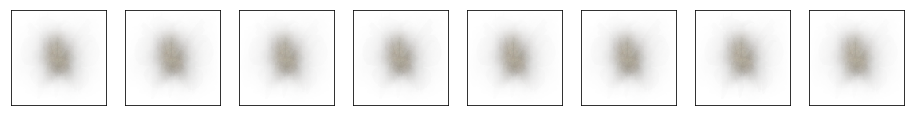

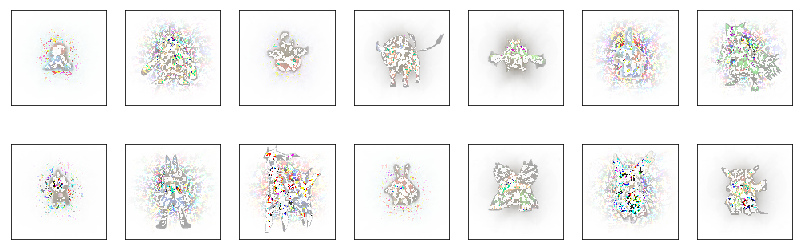

In [37]:
# pca.components_ + mean
comp = np.array(pca.components_)
comp[comp < 0] = 0
comp[comp > 1] = 1
inverse[inverse < 0] = 0
inverse[inverse > 1] = 1
# print(comp)

plot_images((comp + mean)[:8], 8, 1)
plot_images((inverse + mean)[:14], 7, 2)
plt.show()

In [ ]:
i1, i2 = 42, 47
trans1 = 